# Advanced Statistics for Physics Analysis 2020 - 2021
## Lab 1 - Saverio Monaco

In [1]:
# Here we import all libraries we need:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### Exercise 1 - vectors and data frames

#### 1.0 Creating the Dataframe

In [2]:
# I didn't manage to import directly the dataframe from wikipedia, so I'll do it manually:

lakes_names <- c("Ness", "Lomond", "Morar", "Tay", "Awe", "Maree", "Ericht", "Lochy", "Rannoch", "Shiel", "Katrine", "Arkaig", "Shin")
# paste puts Loch before all elements of the string lake_name
lakes_names <- paste("Loch ", lakes_names, sep=" ")
lakes_names

# The first column is ready:

[1] "Loch  Ness"    "Loch  Lomond"  "Loch  Morar"   "Loch  Tay"    
 [5] "Loch  Awe"     "Loch  Maree"   "Loch  Ericht"  "Loch  Lochy"  
 [9] "Loch  Rannoch" "Loch  Shiel"   "Loch  Katrine" "Loch  Arkaig" 
[13] "Loch  Shin"

In [3]:
# Here are the other columns:

volume     <- c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,1.07,0.97,0.79,0.77,0.75,0.35)

area       <- c(56,71,27,26.4,39,28.6,18.6,16,19,19.5,12.4,16,22.5)

lenght     <- c(39,36,18.8,23,41,20,23,16,15.7,28,12.9,19.3,27.8)

max_depth  <- c(230,190,310,150,94,114,156,162,134,128,151,109,49)

mean_depth <- c(132,37,87,60.6,32,38,57.6,70,51,40,43.4,46.5,15.5)

units <- c("","[km^3]", "[km^2]", "[km]", "[m]", "[m]")

In [4]:
# Now we create the dataframe by joining all the columns together
scottish.lakes <- data.frame(lakes_names,volume,area,lenght,max_depth,mean_depth)

# I wanted to show the units too, this is the best solution I thought
# I modified all the names attributes to contain the units too, we can switch back to a unitfree dataframe
# by modifying it again using "oldattr"
oldattr <- names(scottish.lakes)
attr(scottish.lakes,"names") <- paste(names(scottish.lakes), units, sep=" ")[1:6]
scottish.lakes
# We revert back to the old attributes names because they are more easy to access
attr(scottish.lakes,"names") <- oldattr

lakes_names,volume [km^3],area [km^2],lenght [km],max_depth [m],mean_depth [m]
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Loch Ness,7.45,56.0,39.0,230,132.0
Loch Lomond,2.60,71.0,36.0,190,37.0
Loch Morar,2.30,27.0,18.8,310,87.0
Loch Tay,1.60,26.4,23.0,150,60.6
Loch Awe,1.20,39.0,41.0,94,32.0
Loch Maree,1.09,28.6,20.0,114,38.0
Loch Ericht,1.08,18.6,23.0,156,57.6
Loch Lochy,1.07,16.0,16.0,162,70.0
Loch Rannoch,0.97,19.0,15.7,134,51.0


#### 1.1 Evaluate the highest and lowest volume and area lake

In [5]:
### VOLUME ###
# First of all we have to access the volume vector
scottish.lakes$volume
volumes <- scottish.lakes$volume

[1] 7.45 2.60 2.30 1.60 1.20 1.09 1.08 1.07 0.97 0.79 0.77 0.75 0.35

In [6]:
# min() and max() find the minimun and maximum of a vector
vmin <- min(volumes)
vmax <- max(volumes)

In [7]:
volumes == vmin
# It outputs an array of boolean elements, FALSE if the element is NOT equal to vmin, TRUE otherwhise

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13]  TRUE

In [8]:
# The function which tells you where the TRUE element is
which(volumes == vmin)
which(volumes == vmax)

# When importing the table I ordered them with respect to the volume, this is why vmax is the first and 
# vmin the last

[1] 13

[1] 1

In [9]:
# But we are actually not interested in the position in the dataframe, but in the name of the lake
print("Smallest Lake (volume):")
scottish.lakes$lakes_name[which(volumes == vmin)]
print("Biggest Lake (volume):")
scottish.lakes$lakes_name[which(volumes == vmax)]

[1] "Smallest Lake (volume):"


[1] "Loch  Shin"

[1] "Biggest Lake (volume):"


[1] "Loch  Ness"

In [10]:
### AREA ###
# We do the same done for VOLUME
areas <- scottish.lakes$area

amin <- min(areas)
amax <- max(areas)

print("Smallest Lake (area):")
scottish.lakes$lakes_name[which(areas == amin)]
print("Biggest Lake (area):")
scottish.lakes$lakes_name[which(areas == amax)]

[1] "Smallest Lake (area):"


[1] "Loch  Katrine"

[1] "Biggest Lake (area):"


[1] "Loch  Lomond"

#### 1.2 Order the frame with respect to the area and determine the two largest area lakes

In [11]:
scottish.lakes[order(area),]

,lakes_names,volume,area,lenght,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,Loch Katrine,0.77,12.4,12.9,151,43.4
8,Loch Lochy,1.07,16.0,16.0,162,70.0
12,Loch Arkaig,0.75,16.0,19.3,109,46.5
7,Loch Ericht,1.08,18.6,23.0,156,57.6
9,Loch Rannoch,0.97,19.0,15.7,134,51.0
10,Loch Shiel,0.79,19.5,28.0,128,40.0
13,Loch Shin,0.35,22.5,27.8,49,15.5
4,Loch Tay,1.60,26.4,23.0,150,60.6
3,Loch Morar,2.30,27.0,18.8,310,87.0


In [12]:
scottish.lakes[order(area),][1:2,] # first and second

,lakes_names,volume,area,lenght,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
11,Loch Katrine,0.77,12.4,12.9,151,43.4
8,Loch Lochy,1.07,16.0,16.0,162,70.0


In [13]:
# length(scottish.lakes$area) = 13 
# scottish.lakes[order(area),][12:13,]
scottish.lakes[order(area),][(length(scottish.lakes$area)-1):(length(scottish.lakes$area)),]

,lakes_names,volume,area,lenght,max_depth,mean_depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Loch Ness,7.45,56,39,230,132
2,Loch Lomond,2.60,71,36,190,37


#### 1.3 By summing up the areas occpupied by the lakes, determine the area of Scotland covered by water

In [14]:
total_lakes_area <- sum(scottish.lakes$area)
print("Area of Scotland covered by water (lakes):")
total_lakes_area
scotland_total_area <- 	77933 # km^2

perc_of_water <- total_lakes_area/scotland_total_area *100
print("Percentage of Area of Scotland covered by water (lakes):")
perc_of_water

[1] "Area of Scotland covered by water (lakes):"


[1] 372

[1] "Percentage of Area of Scotland covered by water (lakes):"


[1] 0.4773331

### Exercise 2 - Crude Oil Production

#### 2.1 Write R code that is able to read the file and import it in a data frame structure. (Hint: before loading the file, open it with a text editor and check its structure).

In [15]:
# We have to skip the first line
crude_oil <- read.csv('https://drive.google.com/u/0/uc?id=1cUQ8d0kDOw2lmzMAHIPglpdcnHy4GgF3&export=download', skip=1)
# we just display a small part
crude_oil[1:5,]

# Crude prices since 1861
# First two columns never change

,Entity,Code,Year,OilPrice
,<chr>,<chr>,<int>,<dbl>
1,World,OWID_WRL,1861,0.49
2,World,OWID_WRL,1862,1.05
3,World,OWID_WRL,1863,3.15
4,World,OWID_WRL,1864,8.06
5,World,OWID_WRL,1865,6.59


#### 2.2 Produce a plot with the Oil price as a function of the year

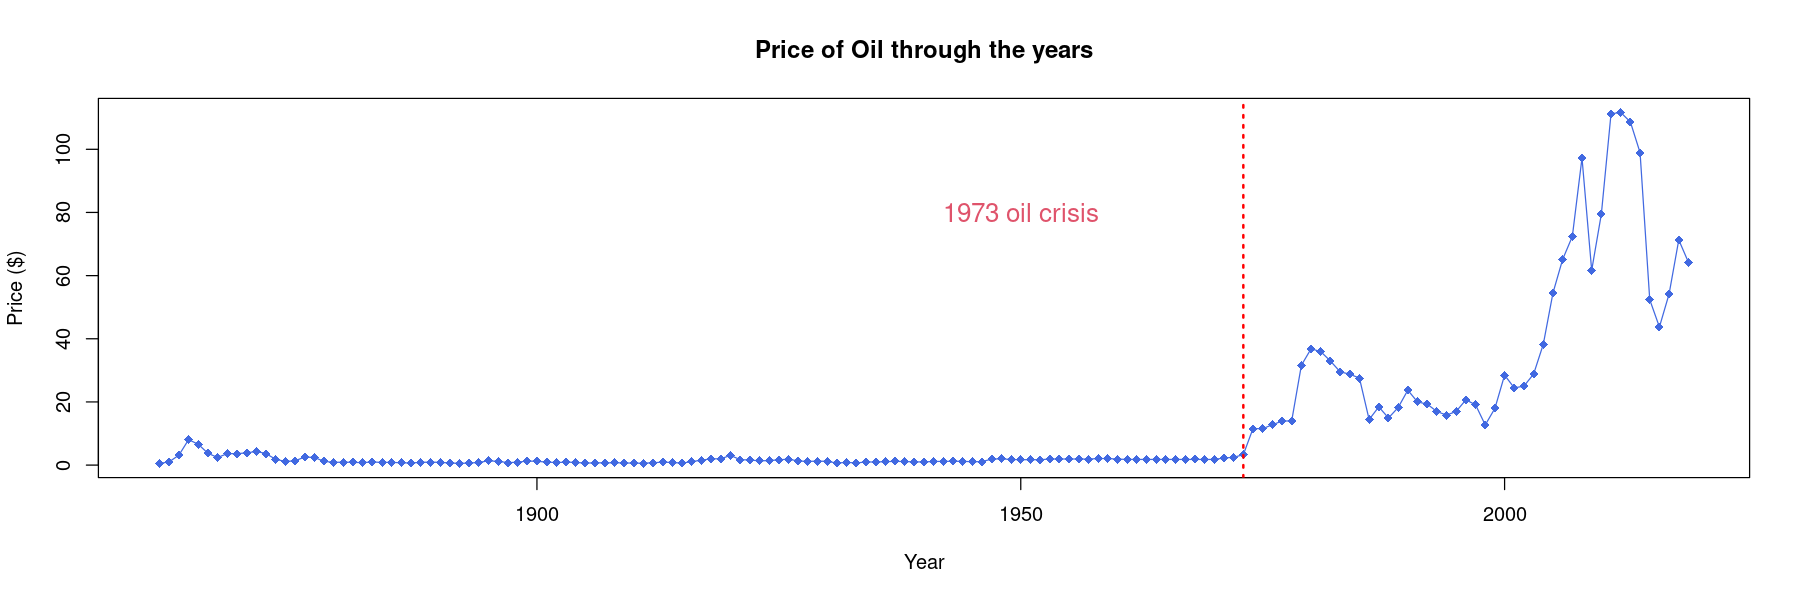

In [16]:
options(repr.plot.width=15, repr.plot.height=5) # an option of jupyter notebook for setting the size of the figure

# We basically have to plot the last two columns
Year <- crude_oil$Year
Price <- crude_oil$OilPrice
plot(Year, Price, pch=18, col='royalblue',main="Price of Oil through the years", ylab = 'Price ($)')
lines(Year, Price, col = 'royalblue')
abline(v=1973, col="red", lwd=2, lty=3)
text(1950, 80, "1973 oil crisis",cex = 1.3, col = 2)

#### 2.3 Which is the highest price in history ? When did it occur ?

In [17]:
# A compact way to find it is the following
print("Year with the highest price of Oil:")
Year[which(Price == max(Price))]

# Basically I selected the year from the year vector (Year[...]) finding the index using the function "which"
# Inside "which" I wrote Price == max(Price), this gives the index where the element in Price is maximum

[1] "Year with the highest price of Oil:"


[1] 2012

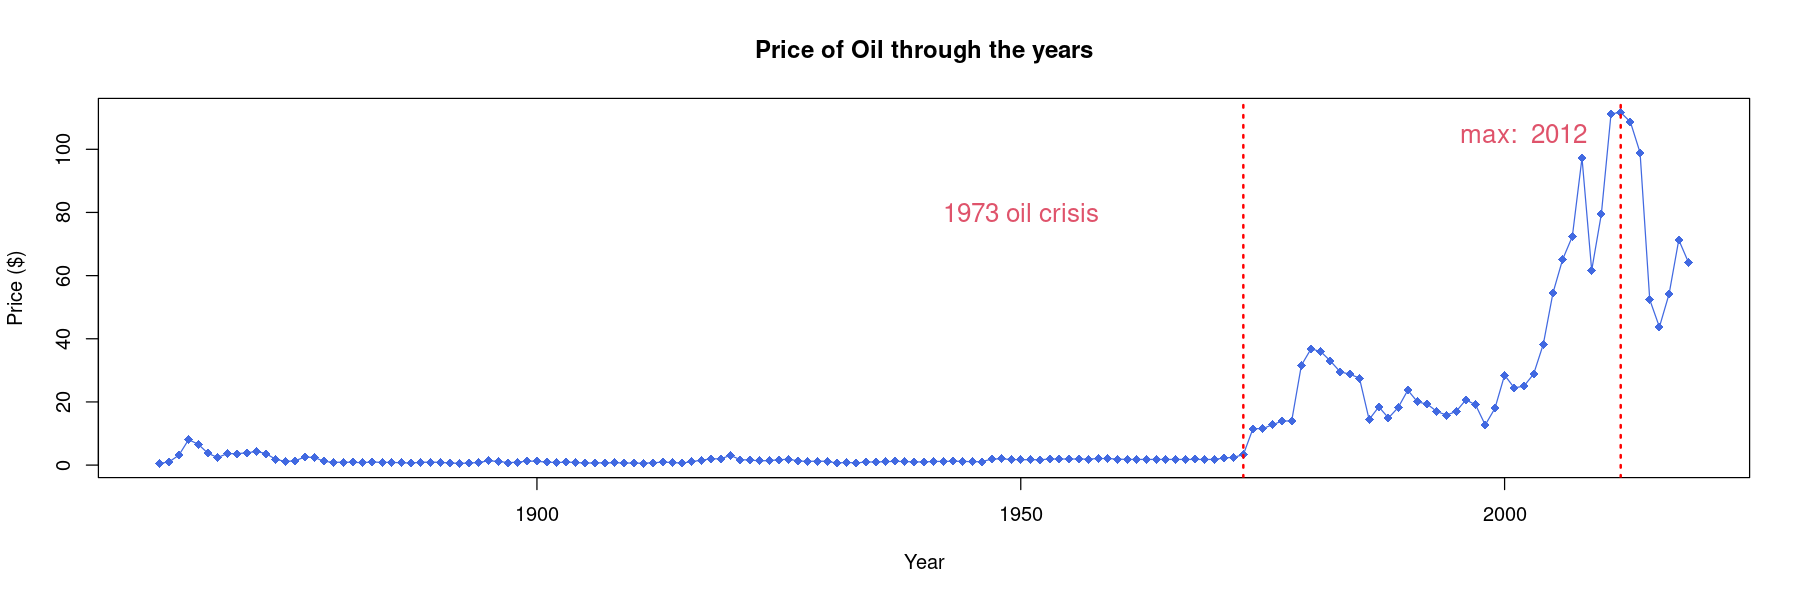

In [18]:
options(repr.plot.width=15, repr.plot.height=5) # an option of jupyter notebook for setting the size of the figure

plot(Year, Price, pch=18, col='royalblue',main="Price of Oil through the years", ylab = 'Price ($)')
lines(Year, Price, col = 'royalblue')

# Vertical line to highlight the 1973 oil crisis
abline(v=1973, col="red", lwd=2, lty=3)
text(1950, 80, "1973 oil crisis",cex = 1.3, col = 2)

# Vertical line to highlight the year with the highest price
abline(v=Year[which(Price == max(Price))], col="red", lwd=2, lty=3)
text(Year[which(Price == max(Price))]-10, 105, paste("max: ",Year[which(Price == max(Price))]),cex = 1.3, col = 2)

#### 2.4 plot the derivative of the curve, simply evaluated with the finite difference formula (forward derivative):
$$\frac{\partial \, price}{\partial \, year} =  price_{j+1} - price_{j}$$

In [19]:
# We can do that through a for loop
der <- rep (0 ,length(Price)-1)
for(j in 1:length(der))
    {
        der[j] <- Price[j+1]-Price[j]    
    }

# I've found another way of doing that with the function diff() (no for loop required)
alt_der <- diff(Price)
 
# If the two methods are the same, they will produce the same vector: alt_der and der should be the same.
# We can compare them using the following command
all(alt_der == der)

[1] TRUE

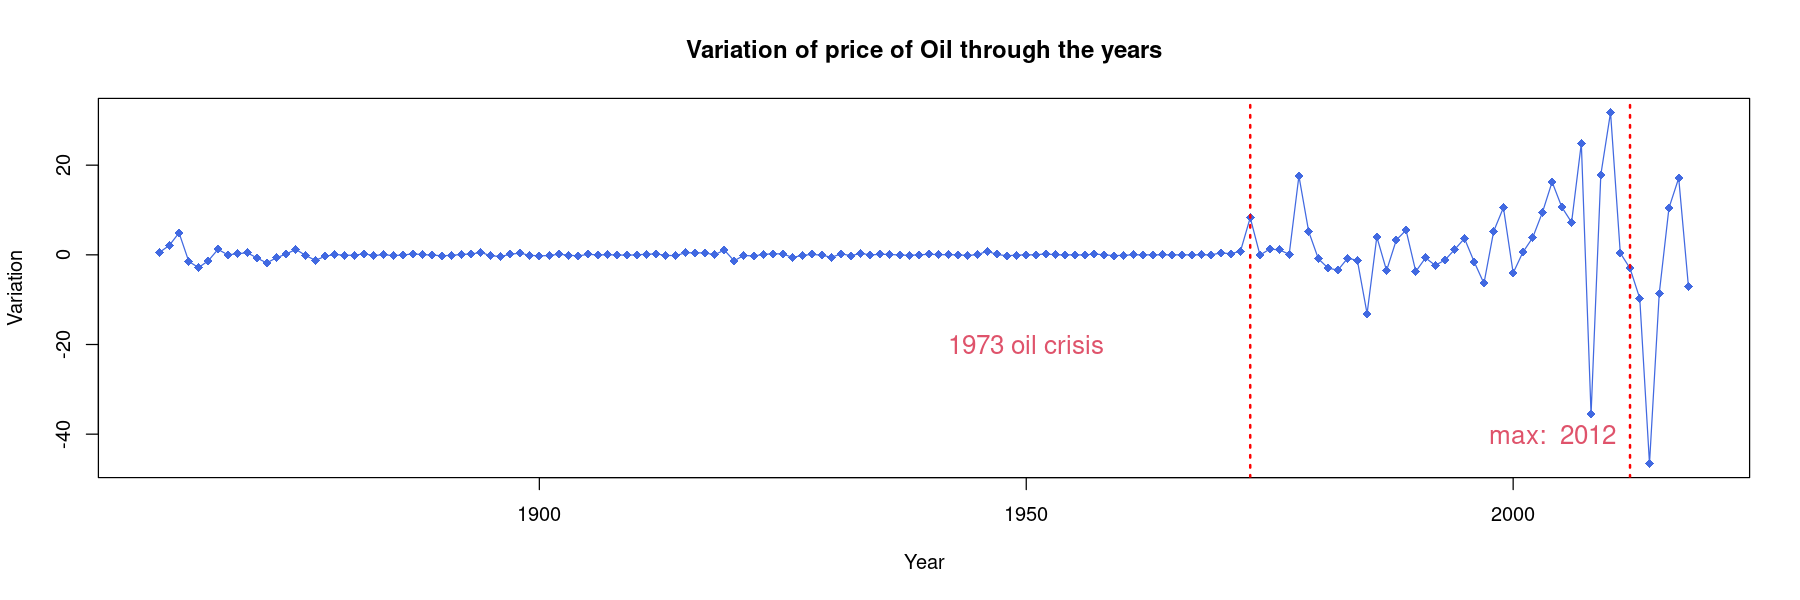

In [20]:
# Plotting the points and lines of the variation of price:
plot(Year[1:(length(Year)-1)], der, pch=18, col='royalblue',main="Variation of price of Oil through the years", 
     xlab='Year',ylab = 'Variation')
lines(Year[1:(length(Year)-1)], der, col = 'royalblue')

# Adding the vertical red lines
abline(v=1973, col="red", lwd=2, lty=3)
text(1950, -20, "1973 oil crisis",cex = 1.3, col = 2)
abline(v=Year[which(Price == max(Price))], col="red", lwd=2, lty=3)
text(Year[which(Price == max(Price))]-8, -40, paste("max: ",Year[which(Price == max(Price))]),cex = 1.3, col = 2)

### Exercise 3 - World Coal Production

#### 3.1 Write R code that is able to read the file and import it in a tibble structure

In [21]:
coal <- read.csv('https://drive.google.com/u/0/uc?id=10kgRQGKEC81QoVW9kj8goNzzyLcT0xld&export=download')
coal <- as_tibble(coal)
# we just display a small part
coal[1545:1550,]

Entity,Code,Year,Coal.production..TWh.
<chr>,<chr>,<int>,<dbl>
Bulgaria,BGR,1951,26.882
Bulgaria,BGR,1952,31.127
Bulgaria,BGR,1953,35.067
Bulgaria,BGR,1954,37.530
Bulgaria,BGR,1955,42.105
Bulgaria,BGR,1956,45.537


#### 3.2 Count the number of countries available in the file and produce a barplot with the number of entries for each country

In [22]:
countries <- unique(coal$Entity)
#countries
# We now itialize now a vector where each cell represent the number of entries of a country
names_instances = rep(0 ,length(countries)) # must be the same length of the number of countries

# Through a for loop we can assign for each element (each country) the number of entries through the function sum
for (j in 1:length(countries))
 {
   names_instances[j] <- sum(coal$Entity == countries[j])
 }

In [23]:
# We can check if our for loop went right by checking if the number of rows in the dataframe is equal to the 
# number of all instances reported by names_instances
nrow(coal) == sum(names_instances)

[1] TRUE

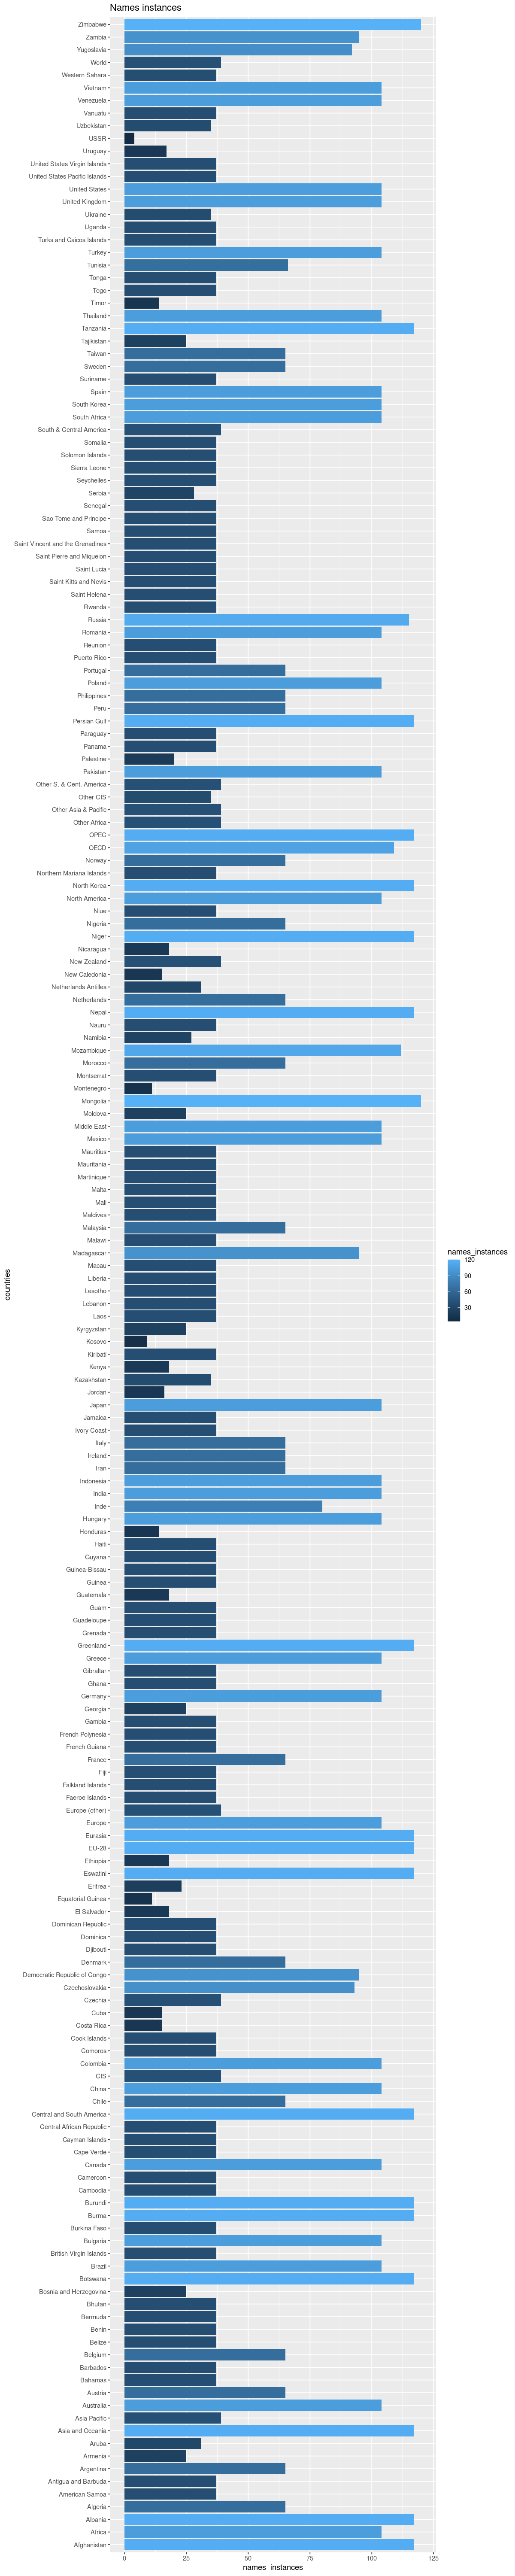

In [24]:
library(repr)
options(repr.plot.width=10, repr.plot.height=50)
ex3plt <- tibble(countries,names_instances)
ggplot(ex3plt, aes(x=countries, y=names_instances, fill=names_instances)) +
geom_bar(stat='identity') +
ggtitle('Names instances') + 
coord_flip()

#### for the following items select only the years ≥ 1970:

In [25]:
# simple as that
r_coal <- filter(coal, Year>=1970)

#### 3.3 Selecting only the year after 1970, determine the total integrated production for each country and print the top 5 Countries with highest coal productions

In [26]:
int_prod = rep(0 ,length(countries))
for (j in 1:length(countries))
    {
        int_prod[j] <- sum(coal$Coal.production..TWh.[coal$Entity == countries[j]])
    }

In [27]:
# We make a dataframe joining countries and int_prod
countries_prod <- tibble(countries,int_prod)

# Now we order them in descending order
countries_prod <- countries_prod %>% arrange(desc(int_prod))

countries_prod[1:5,]

countries,int_prod
<chr>,<dbl>
World,1260113.2
OECD,997985.2
Asia and Oceania,761723.9
Asia Pacific,690240.5
China,480890.5


In [28]:
# some elements are not really countries, but groups of them, I'd better remove them
not_countries = c('World', 'OECD', 'Asia and Oceania', 'Asia Pacific','EU-28','Europe','Eurasia','CIS', 'North America')
# there are other 'not countries', but they don't end up in the top 5 so it does not matter that much

countries_prod_n <- filter(countries_prod, ! countries %in% not_countries)

countries_prod_n %>% top_n(5) 
# Now we have our top 5

Selecting by int_prod



countries,int_prod
<chr>,<dbl>
China,480890.5
United States,450350.2
Russia,176007.3
United Kingdom,115911.9
Germany,113267.6


#### 3.4  For the 5 top Countries, create a plot of production as a function of time

In [29]:
top5 <- countries_prod_n$countries[1:5]
top5


[1] "China"          "United States"  "Russia"         "United Kingdom"
[5] "Germany"

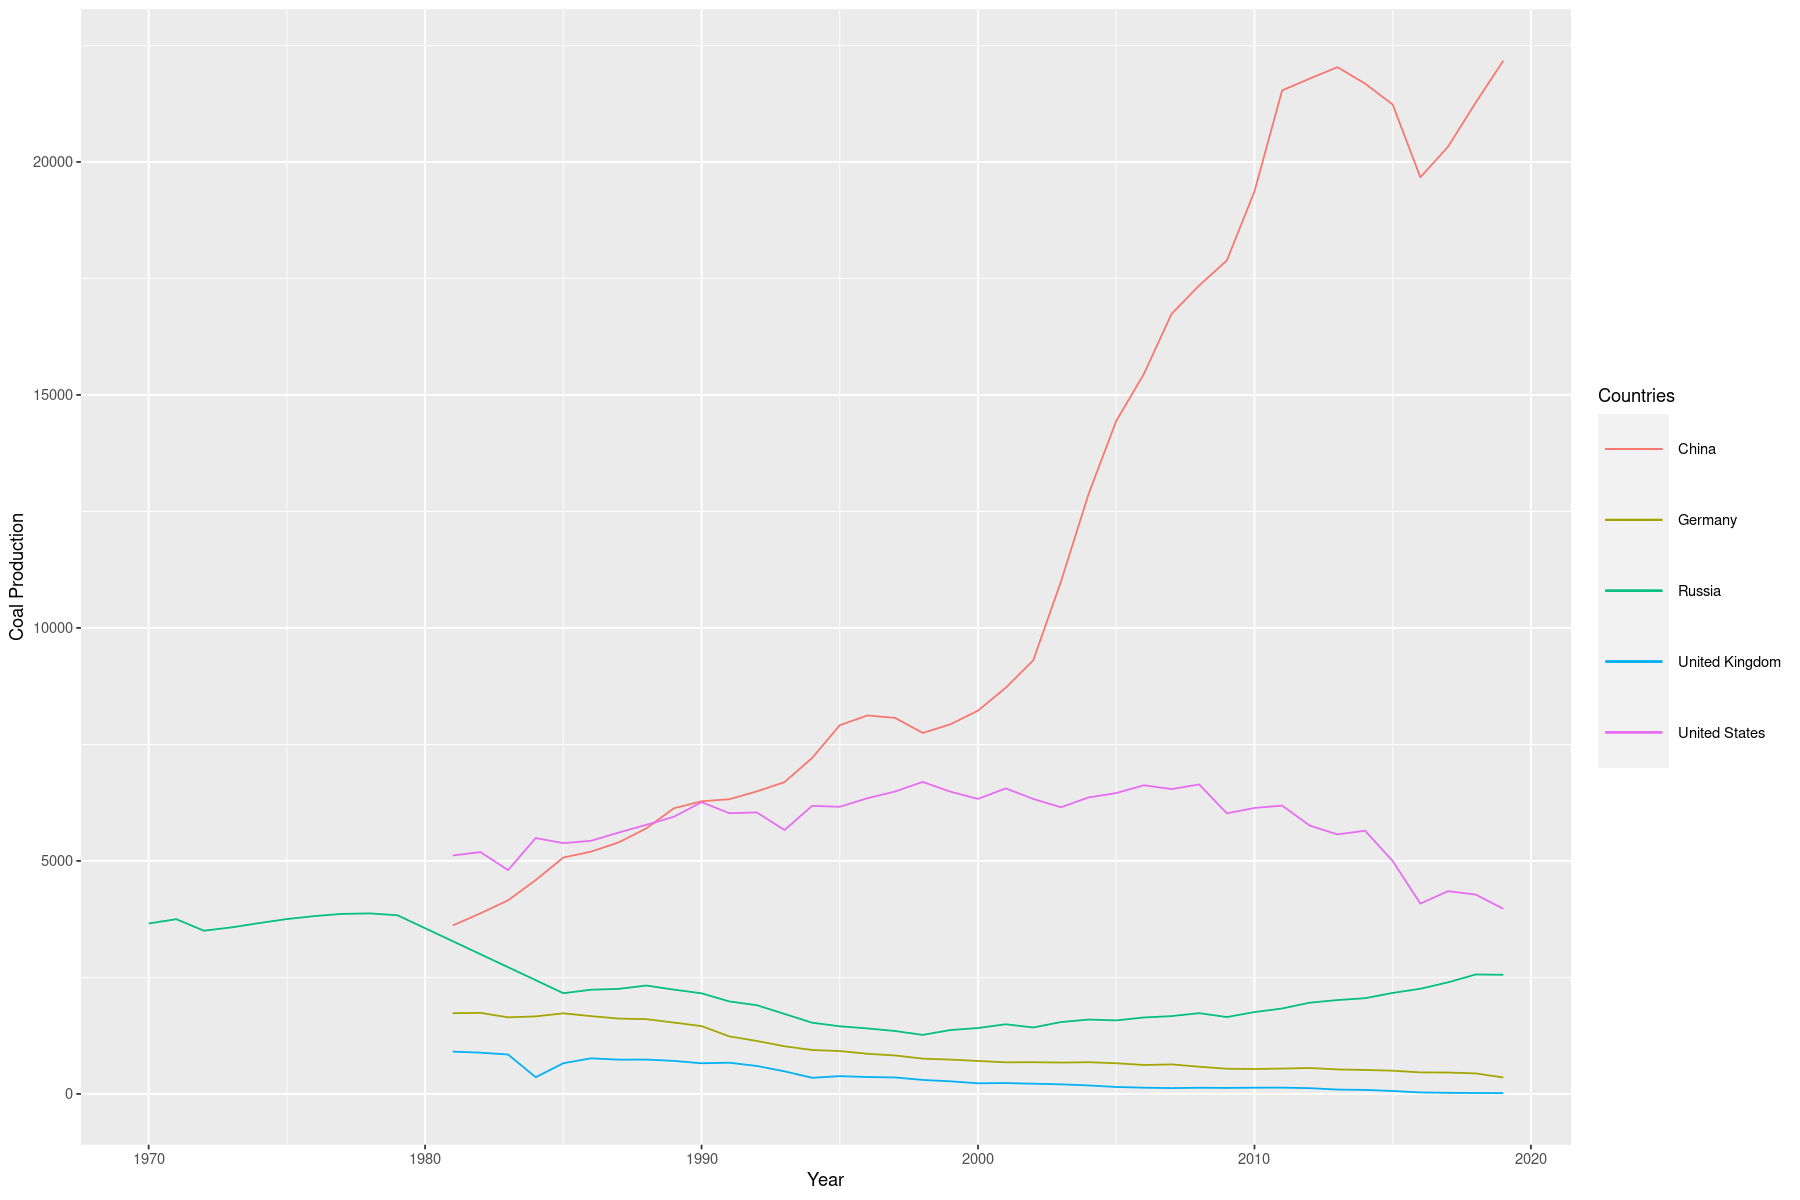

In [30]:
options(repr.plot.width=15, repr.plot.height=10)

top5_coal <- filter(r_coal, Entity %in% top5)

df1 <- data.frame(x=top5_coal$Year[top5_coal$Entity==top5[1]], y=top5_coal$Coal.production..TWh.[top5_coal$Entity==top5[1]])
df2 <- data.frame(x=top5_coal$Year[top5_coal$Entity==top5[2]], y=top5_coal$Coal.production..TWh.[top5_coal$Entity==top5[2]])
df3 <- data.frame(x=top5_coal$Year[top5_coal$Entity==top5[3]], y=top5_coal$Coal.production..TWh.[top5_coal$Entity==top5[3]])
df4 <- data.frame(x=top5_coal$Year[top5_coal$Entity==top5[4]], y=top5_coal$Coal.production..TWh.[top5_coal$Entity==top5[4]])
df5 <- data.frame(x=top5_coal$Year[top5_coal$Entity==top5[5]], y=top5_coal$Coal.production..TWh.[top5_coal$Entity==top5[5]])

ggplot(df1,aes(x,y))+geom_line(aes(color=top5[1]))+
geom_line(data=df2,aes(color=top5[2]))+
geom_line(data=df3,aes(color=top5[3]))+
geom_line(data=df4,aes(color=top5[4]))+
geom_line(data=df5,aes(color=top5[5]))+

theme(legend.key.size = unit(1.5, 'cm'))+ 

labs(x = 'Year', y = 'Coal Production', color="Countries")

#### 3.5   Generate a plot with the cumulative sum of the World’s coal production over the years

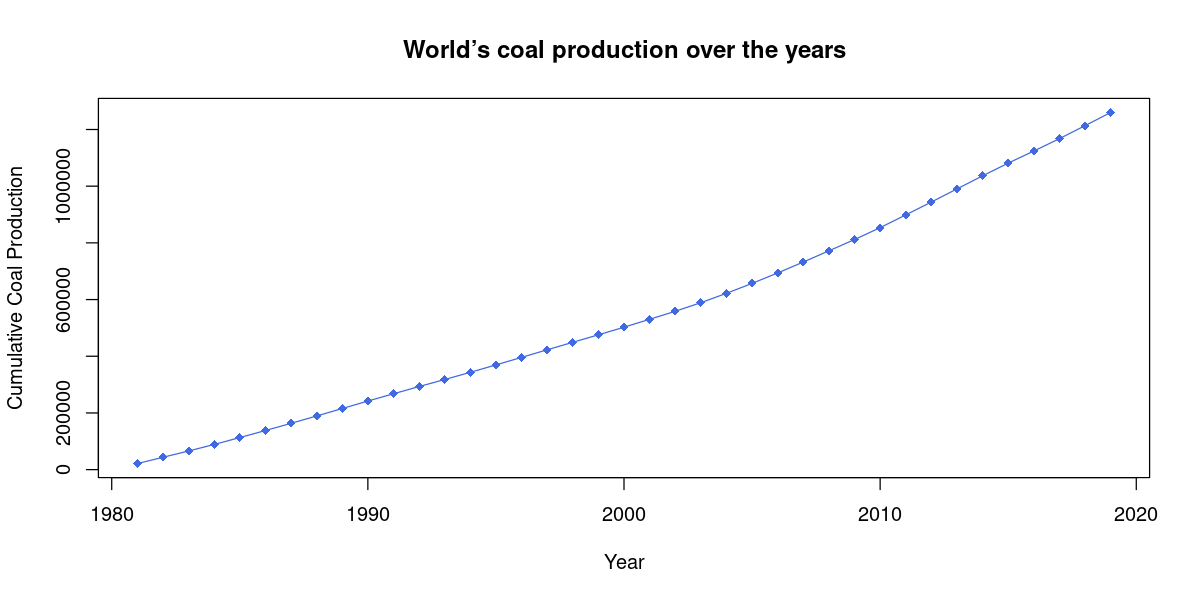

In [31]:
options(repr.plot.width=10, repr.plot.height=5)

world <- filter(r_coal, Entity=='World')
plot(world$Year, cumsum(world$Coal.production..TWh.), main = 'World’s coal production over the years',
     col='royalblue', pch=18, xlab = 'Year', ylab = 'Cumulative Coal Production')
lines(world$Year, cumsum(world$Coal.production..TWh.),col='royalblue')

### Exercise 4 - Covid19 Vaccine data

#### 4.1.0 Importing file vaccinationsby-manufacturer.csv

In [32]:
vaccin_man <- as_tibble(read.csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv'))

#### 4.1.1 filter() the original tibble by selecting the following countries: Italy

In [33]:
italy_man <- filter(vaccin_man, location == 'Italy')
italy_man[1:3,] 

location,date,vaccine,total_vaccinations
<chr>,<chr>,<chr>,<int>
Italy,2020-12-27,Pfizer/BioNTech,7152
Italy,2020-12-28,Pfizer/BioNTech,8573
Italy,2020-12-29,Pfizer/BioNTech,9577


#### 4.1.2 Plot the number of vaccines given as a function of time for the different vaccine manufacturer

In [34]:
# I want to know how many vaccine manufacters there are
manufacturers = unique(vaccin_man$vaccine)
manufacturers

[1] "Pfizer/BioNTech"    "Sinovac"            "Moderna"           
[4] "Oxford/AstraZeneca" "Johnson&Johnson"

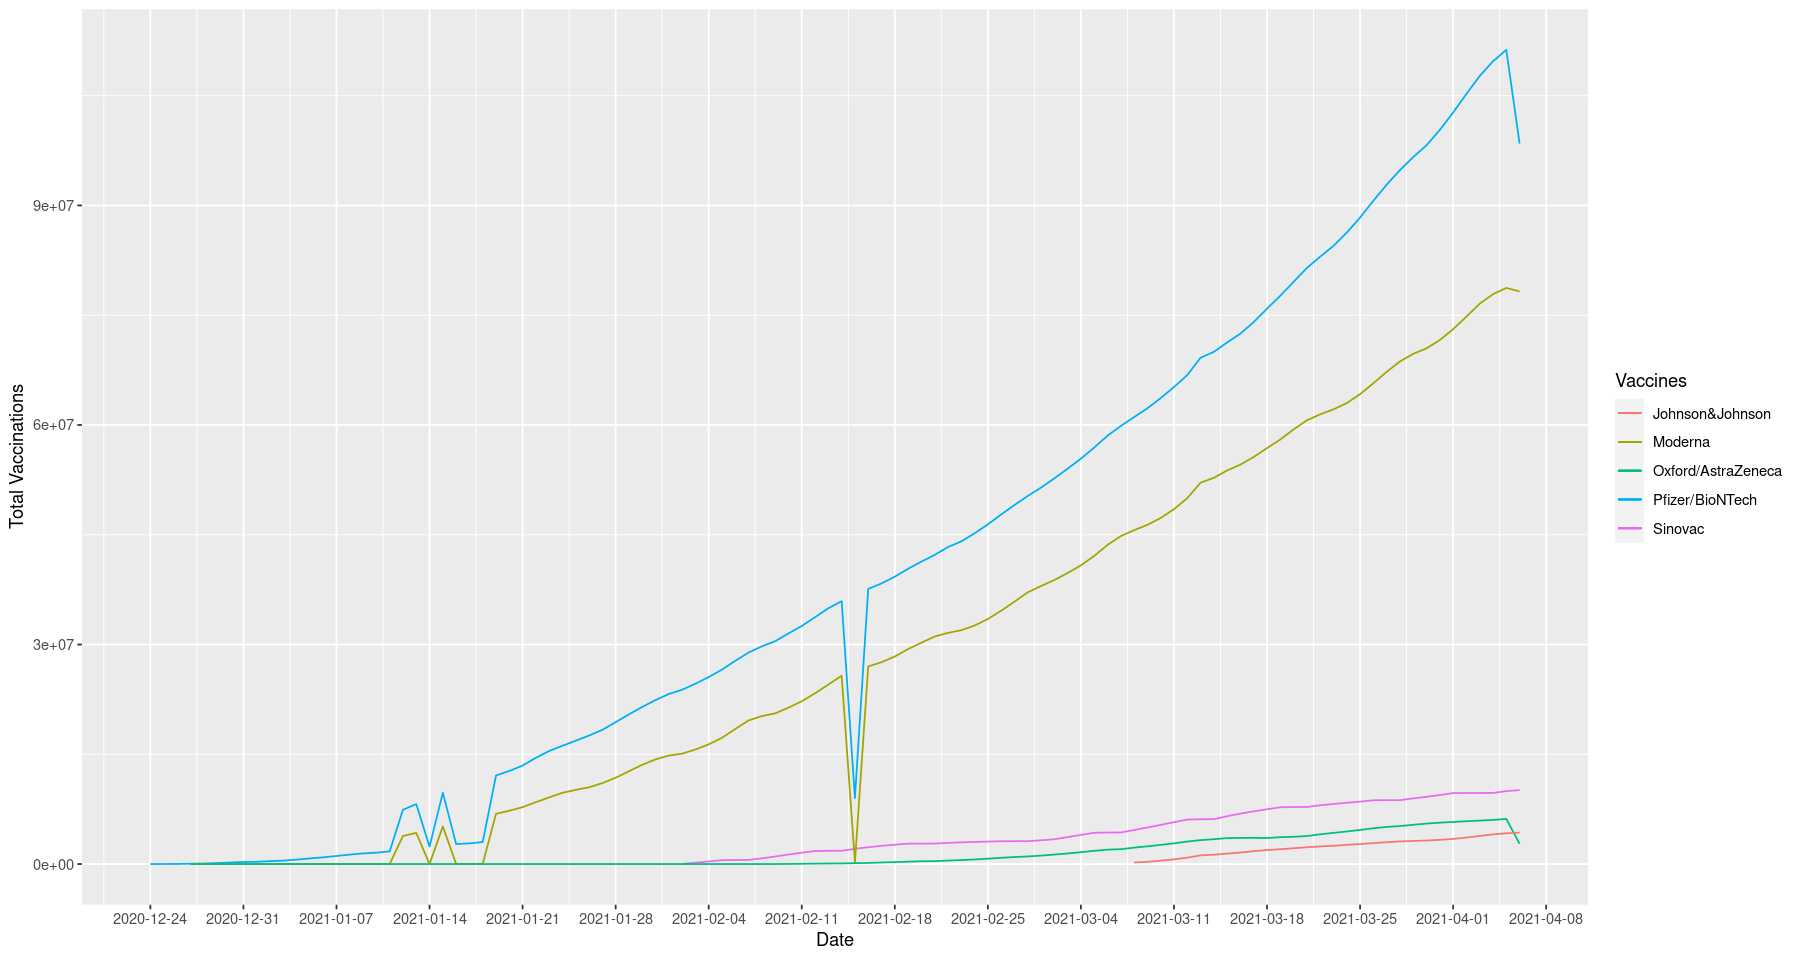

In [35]:
options(repr.plot.width=15, repr.plot.height=8)

ggplot(filter(vaccin_man,vaccine==manufacturers[1]) %>% group_by(date) %>% 
summarise(tot = sum(total_vaccinations)),aes(x=as.Date(date),y=tot))+
geom_line(data=filter(vaccin_man,vaccine==manufacturers[1]) %>% group_by(date) %>% 
summarise(tot = sum(total_vaccinations)),aes(color=manufacturers[1])) +

geom_line(data=filter(vaccin_man,vaccine==manufacturers[2]) %>% group_by(date) %>% 
summarise(tot = sum(total_vaccinations)),aes(color=manufacturers[2])) +

geom_line(data=filter(vaccin_man,vaccine==manufacturers[3]) %>% group_by(date) %>% 
summarise(tot = sum(total_vaccinations)),aes(color=manufacturers[3])) +

geom_line(data=filter(vaccin_man,vaccine==manufacturers[4]) %>% group_by(date) %>% 
summarise(tot = sum(total_vaccinations)),aes(color=manufacturers[4])) +

geom_line(data=filter(vaccin_man,vaccine==manufacturers[5]) %>% group_by(date) %>% 
summarise(tot = sum(total_vaccinations)),aes(color=manufacturers[5])) +

scale_x_date(date_breaks  ="7 day") + 
labs(x = 'Date', y = 'Total Vaccinations', color="Vaccines")

#### 4.1.3 From the same tibble plot the total number of vaccines shot per day in Italy

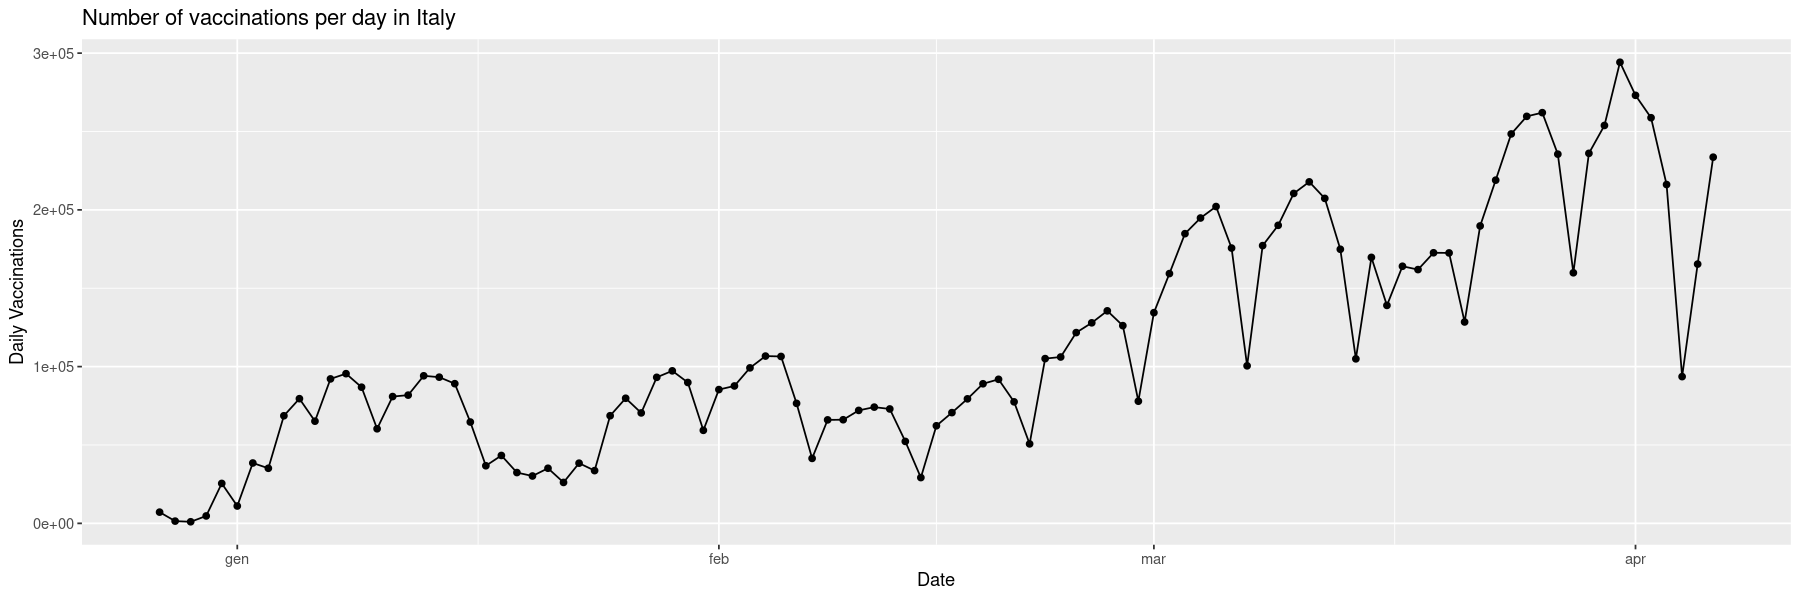

In [36]:
options(repr.plot.width=15, repr.plot.height=5)

italy_plt <- italy_man %>% group_by(date) %>% summarise(tot = sum(total_vaccinations))

ggplot(italy_plt,aes(x=as.Date(date),y=diff(c(0, tot))))+
geom_point(aes()) +
geom_line(data=italy_plt,aes()) + 
ggtitle('Number of vaccinations per day in Italy') +
labs(x = 'Date', y = 'Daily Vaccinations')

#### 4.1.4 Do the same exercise for the following countries: Germany and United States of America

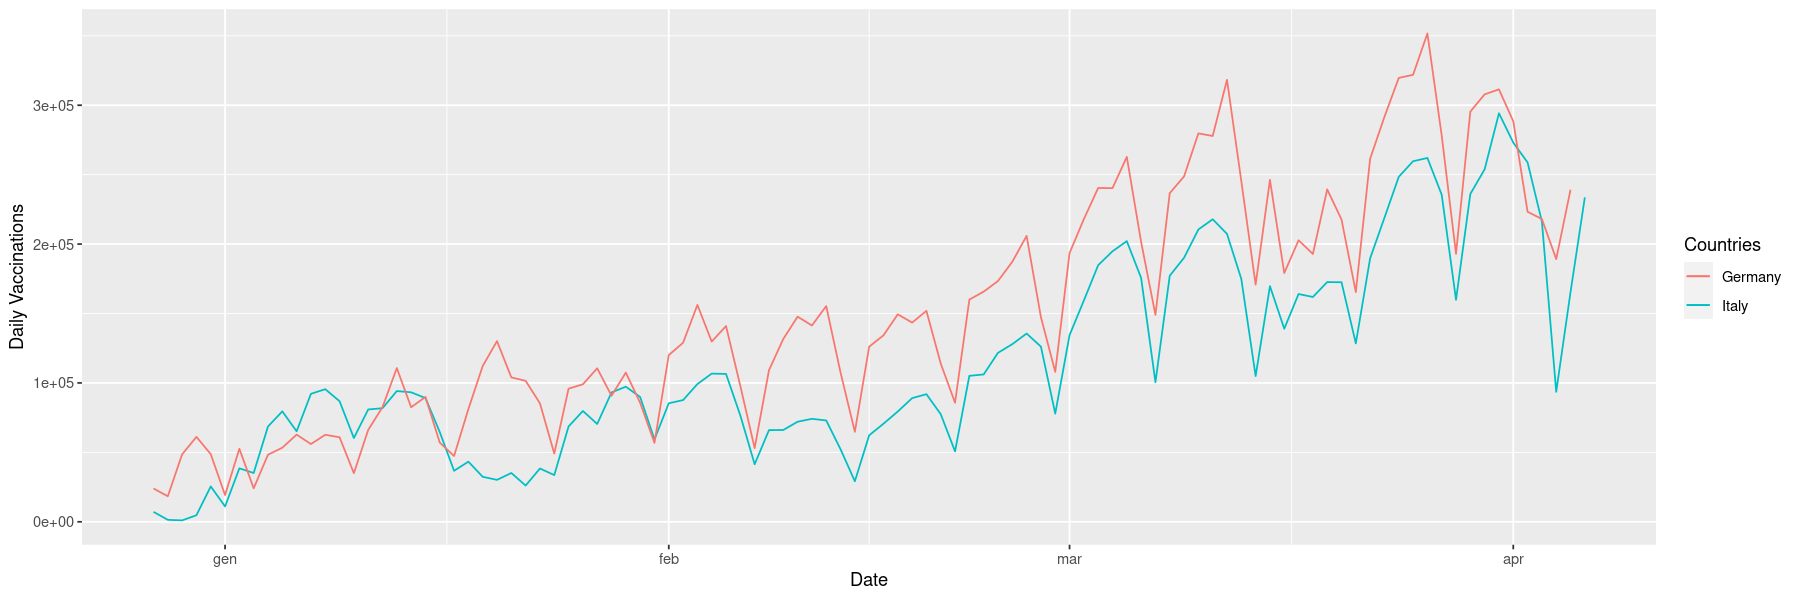

In [37]:
countries <- c('Italy', 'Germany', 'United States')
ggplot(filter(vaccin_man, location == countries[1]) %>% group_by(date) %>% summarise(tot = sum(total_vaccinations)),aes(x=as.Date(date),y=diff(c(0, tot))))+
geom_line(data=filter(vaccin_man, location == countries[1]) %>% group_by(date) %>% summarise(tot = sum(total_vaccinations)),aes(color=countries[1]))+
geom_line(data=filter(vaccin_man, location == countries[2]) %>% group_by(date) %>% summarise(tot = sum(total_vaccinations)),aes(color=countries[2])) + 
labs(x = 'Date', y = 'Daily Vaccinations', color = 'Countries')

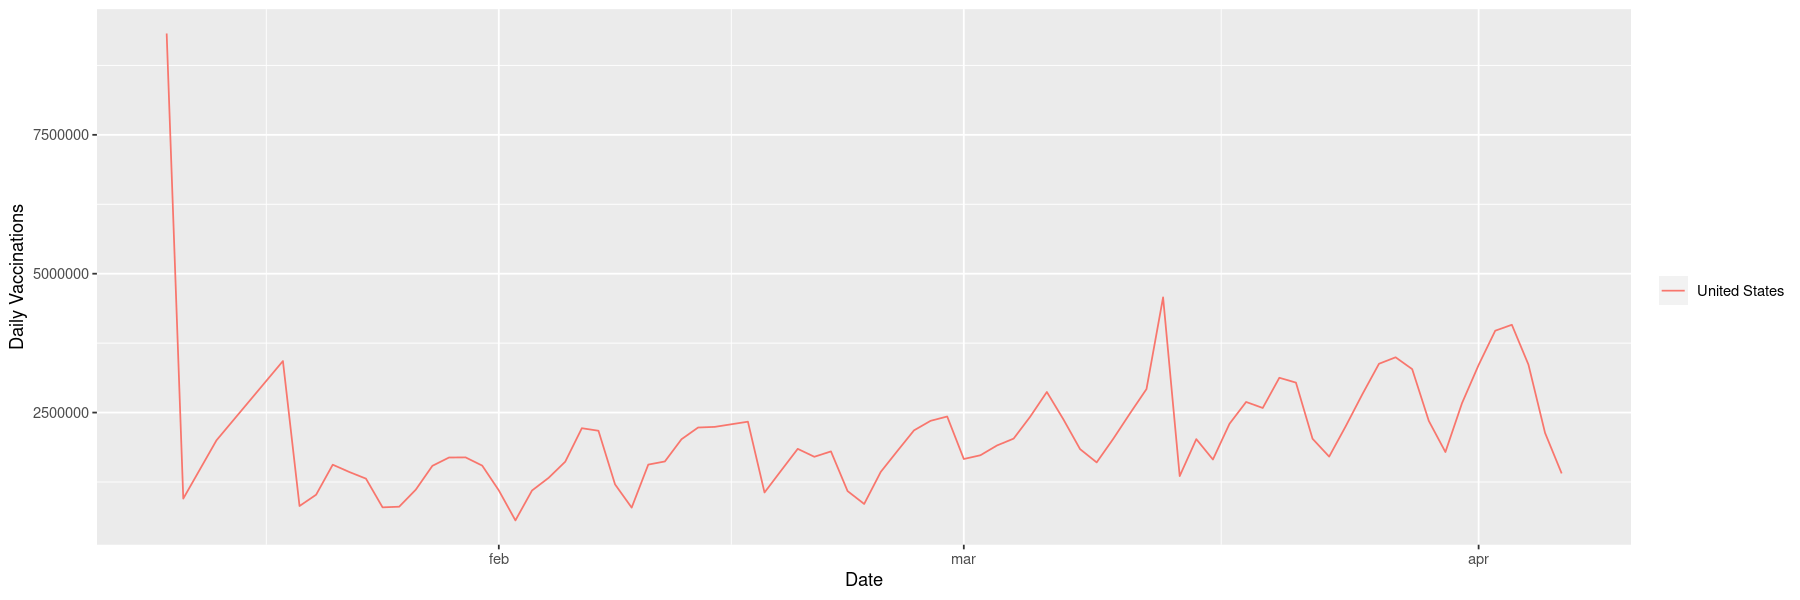

In [38]:
ggplot(filter(vaccin_man, location == countries[3]) %>% group_by(date) %>% summarise(tot = sum(total_vaccinations)),aes(x=as.Date(date),y=diff(c(0, tot))))+
geom_line(data=filter(vaccin_man, location == countries[3]) %>% group_by(date) %>% summarise(tot = sum(total_vaccinations)),aes(color=countries[3])) + 
labs(x = 'Date', y = 'Daily Vaccinations', color = '')

#### 4.2.0 Importing file vaccinations.csv

In [39]:
vaccinations <- as_tibble(read.csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv'))
vaccinations[1:4,]
eu <- as_tibble(read.csv('https://raw.githubusercontent.com/ajturner/acetate/master/places/Countries-Europe.csv'))

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
Afghanistan,AFG,2021-02-22,0,0,NA,NA,NA,0,0,NA,NA
Afghanistan,AFG,2021-02-23,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-24,NA,NA,NA,NA,1367,NA,NA,NA,35
Afghanistan,AFG,2021-02-25,NA,NA,NA,NA,1367,NA,NA,NA,35


#### 4.2.1 Selecting all the European countries in the tibble, plot the number of daily vaccinations per million as a function of date

In [40]:
eu_vaccinations <- filter(vaccinations,location %in% eu$name)
eu_vaccinations[600:605,]

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
Croatia,HRV,2021-02-23,NA,NA,NA,NA,6757,NA,NA,NA,1646
Croatia,HRV,2021-02-24,184076,125771,58305,NA,7009,4.48,3.06,1.42,1707
Croatia,HRV,2021-02-25,194267,135756,58511,10191,7435,4.73,3.31,1.43,1811
Croatia,HRV,2021-02-26,NA,NA,NA,NA,7252,NA,NA,NA,1767
Croatia,HRV,2021-02-27,NA,NA,NA,NA,7069,NA,NA,NA,1722
Croatia,HRV,2021-02-28,NA,NA,NA,NA,6886,NA,NA,NA,1677


In [41]:
eu_dvpm <- eu_vaccinations %>% group_by(date) %>% summarise(dvpm = sum(daily_vaccinations_per_million, na.rm = TRUE))

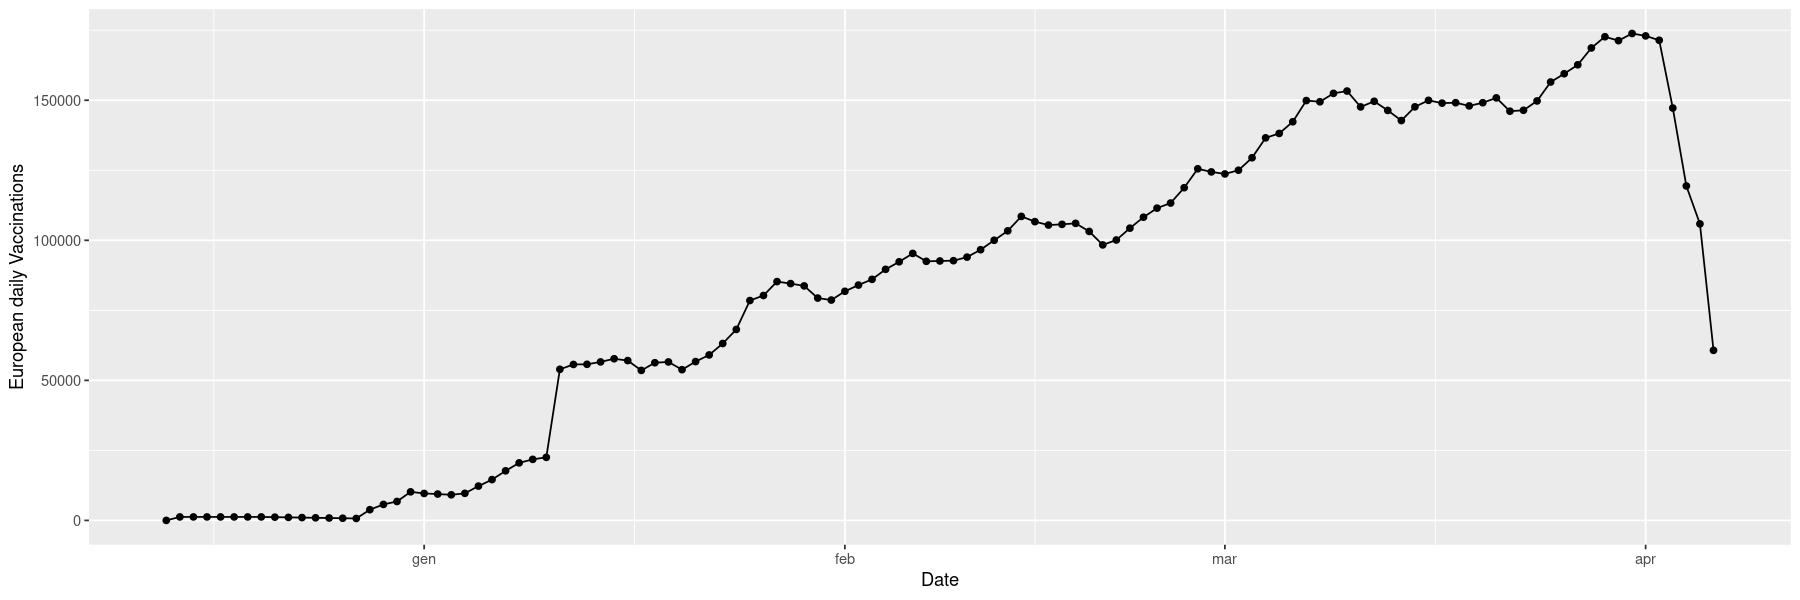

In [42]:
ggplot(eu_dvpm,aes(x=as.Date(date),y=dvpm))+
geom_point(aes()) +
geom_line(data=eu_dvpm,aes()) + 
labs(x = 'Date', y = 'European daily Vaccinations')

#### 4.2.2 Study the data structure and produce few relevant plots of your taste

Warning message:
“Removed 21 row(s) containing missing values (geom_path).”
Warning message:
“Removed 21 row(s) containing missing values (geom_path).”
Warning message:
“Removed 30 row(s) containing missing values (geom_path).”


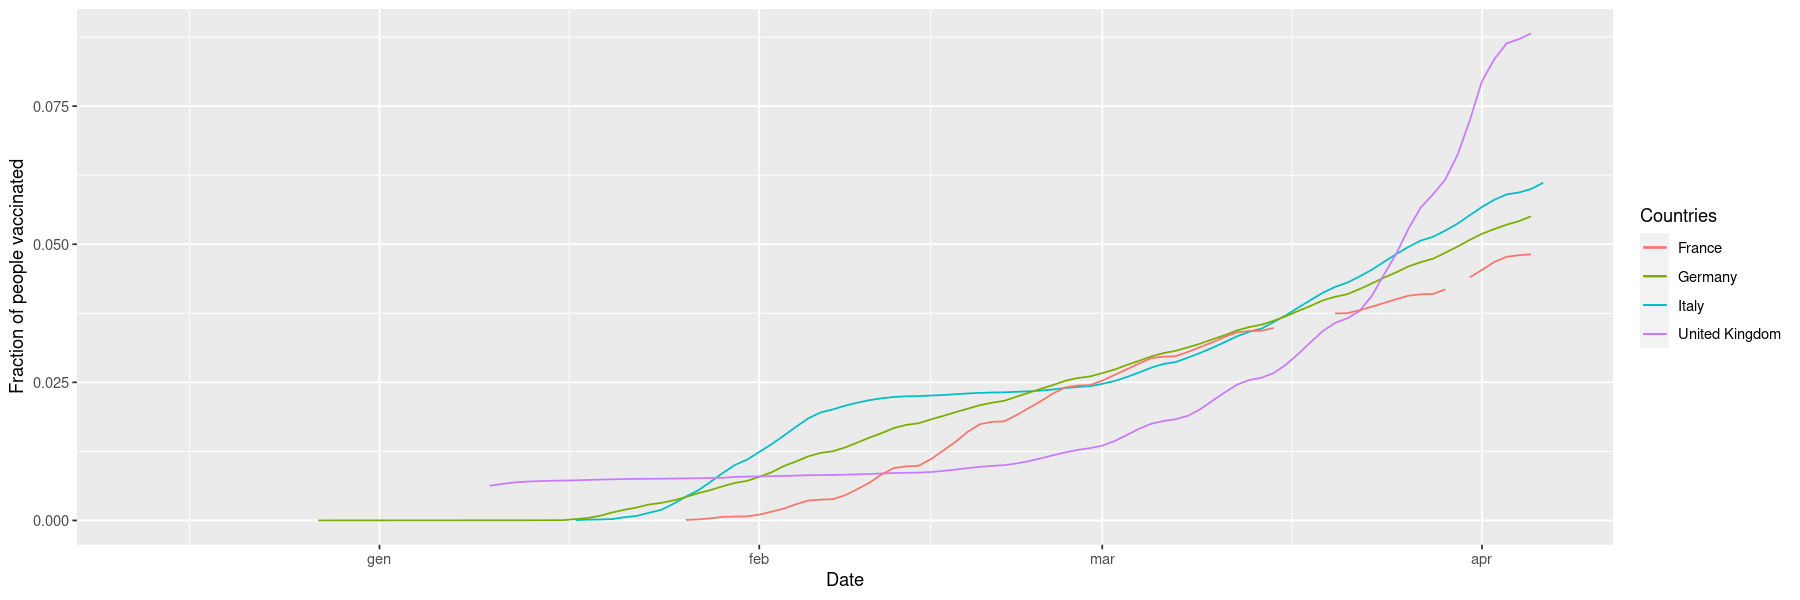

In [43]:
# >> 1
# Let's plot the fraction of people vaccinated of the main european countries

ggplot( filter(eu_vaccinations,location == 'Italy') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/filter(eu, name == 'Italy')$population) ,aes(x=as.Date(date),y=dvpm))+
geom_line(data=filter(eu_vaccinations,location == 'Italy') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/filter(eu, name == 'Italy')$population),aes(color = 'Italy')) + 
geom_line(data=filter(eu_vaccinations,location == 'Germany') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/filter(eu, name == 'Germany')$population),aes(color = 'Germany')) + 
geom_line(data=filter(eu_vaccinations,location == 'United Kingdom') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/filter(eu, name == 'United Kingdom')$population),aes(color = 'United Kingdom')) + 
geom_line(data=filter(eu_vaccinations,location == 'France') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/filter(eu, name == 'France')$population),aes(color = 'France')) + 

labs(x = 'Date', y = 'Fraction of people vaccinated', colour = 'Countries')

Warning message:
“Removed 21 row(s) containing missing values (geom_path).”
Warning message:
“Removed 16 row(s) containing missing values (geom_path).”


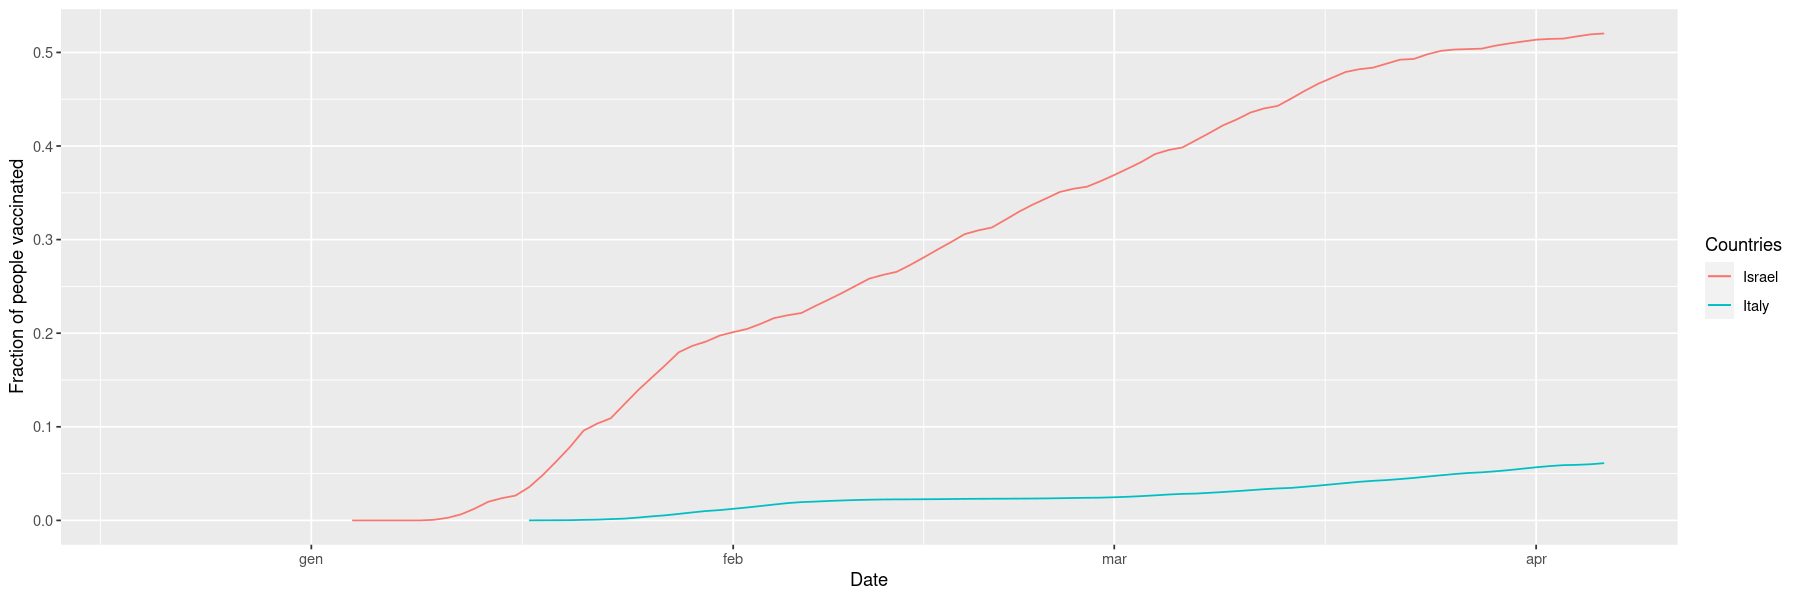

In [44]:
# >> 2
# Let's compare the fraction of people vaccinated in Italy and in Israel. In the latter, the vaccination campaign
# has been praised for its velocity
# (infact in the plot we can see the difference, over than half of its population has been vaccinated already)

israel_pop <- 9364000

ggplot( filter(eu_vaccinations,location == 'Italy') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/filter(eu, name == 'Italy')$population) ,aes(x=as.Date(date),y=dvpm))+
geom_line(data=filter(eu_vaccinations,location == 'Italy') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/filter(eu, name == 'Italy')$population),aes(color = 'Italy')) +  
geom_line(data=filter(vaccinations,location == 'Israel') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/israel_pop),aes(color = 'Israel')) +

labs(x = 'Date', y = 'Fraction of people vaccinated', colour = 'Countries')

Warning message:
“Removed 21 row(s) containing missing values (geom_path).”
Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


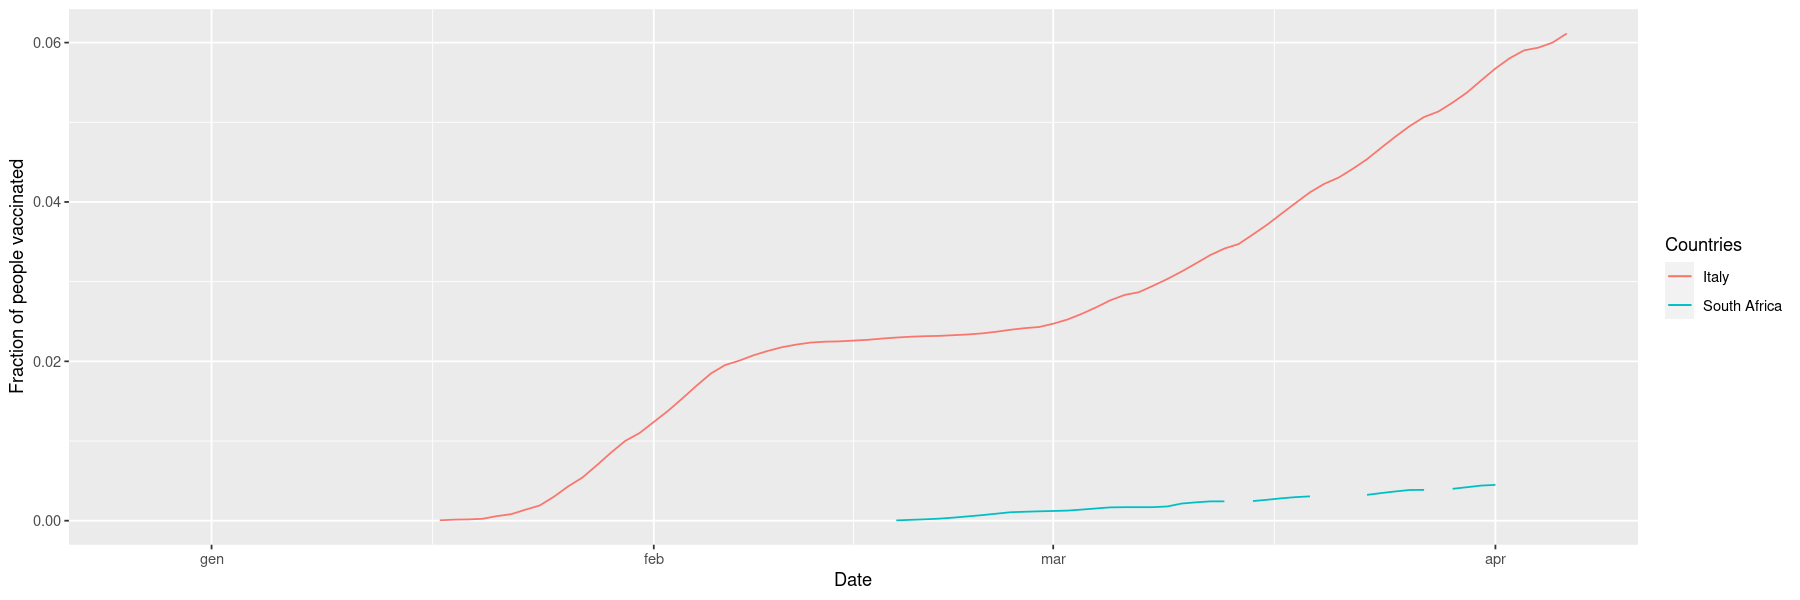

In [45]:
# >> 3
# Here I compared the fraction of people vaccinated in Italy and in South Africa that are similar in terms of
# population. Countries like South Africa are helped by COVAX, an organization of many states that gives access to
# vaccines to less fortunate countries

southaf_pop <-  59884476

ggplot( filter(eu_vaccinations,location == 'Italy') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/filter(eu, name == 'Italy')$population) ,aes(x=as.Date(date),y=dvpm))+
geom_line(data=filter(eu_vaccinations,location == 'Italy') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/filter(eu, name == 'Italy')$population),aes(color = 'Italy')) +  
geom_line(data=filter(vaccinations,location == 'South Africa') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/southaf_pop),aes(color = 'South Africa')) + 

labs(x = 'Date', y = 'Fraction of people vaccinated', colour = 'Countries')

location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
China,CHN,2020-12-15,1500000,NA,NA,NA,NA,0.1,NA,NA,NA
China,CHN,2020-12-16,NA,NA,NA,NA,187500,NA,NA,NA,130
China,CHN,2020-12-17,NA,NA,NA,NA,187500,NA,NA,NA,130
China,CHN,2020-12-18,NA,NA,NA,NA,187500,NA,NA,NA,130


Warning message:
“Removed 14 row(s) containing missing values (geom_path).”


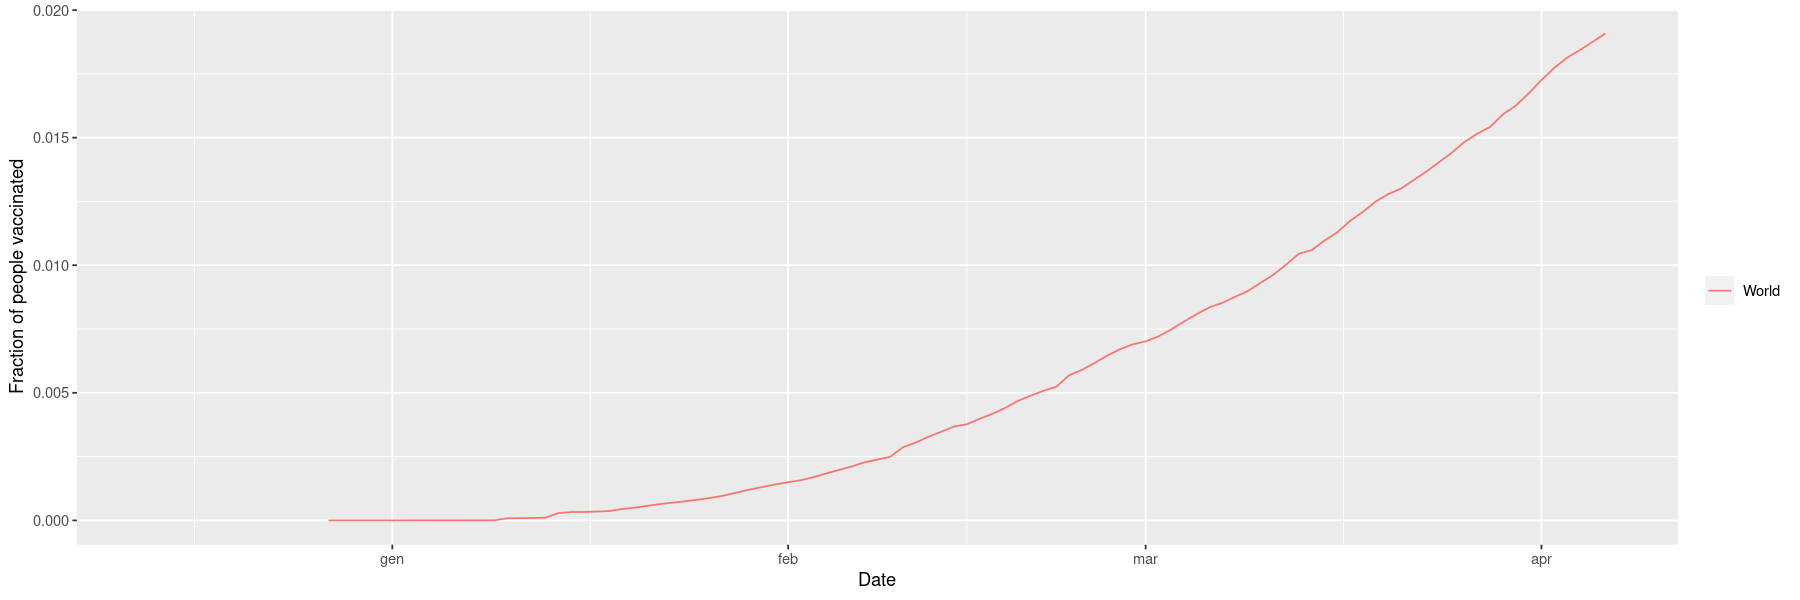

In [46]:
# >> 4
# This graph should represent the fraction of people vaccinated throughout the world, however in the data
# obtained from github many instances are missing and replaced by "NA".
# For example we can see that there are no data regarding China and many places in Africa:
filter(vaccinations,location == 'China')[1:4,]

world_pop <-   7856504875

ggplot( filter(vaccinations,location == 'World') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/world_pop) ,aes(x=as.Date(date),y=dvpm))+
geom_line(data=filter(vaccinations,location == 'World') %>% group_by(date) %>% 
summarise(dvpm = sum(people_fully_vaccinated)/world_pop),aes(color = 'World')) + 

labs(x = 'Date', y = 'Fraction of people vaccinated', colour = '')

In [47]:
# >> 5
# Following some suspicious deaths after some shots of Astrazeneca, AIFA was pressured to ban Astrazeneca
# as a precaution.
# Here I show the daily vaccinations made in Italy of the vaccine Astrazeneca

manufacturers[4]
astrazen =    filter(vaccin_man,vaccine==manufacturers[4])
astrazen_it = filter(astrazen, location=='Italy')
astrazen_it[1:4,]
daily_vaccinations = diff(astrazen_it$total_vaccinations)
date = as.Date(astrazen_it$date)

[1] "Oxford/AstraZeneca"

location,date,vaccine,total_vaccinations
<chr>,<chr>,<chr>,<int>
Italy,2021-01-22,Oxford/AstraZeneca,3
Italy,2021-01-30,Oxford/AstraZeneca,4
Italy,2021-02-01,Oxford/AstraZeneca,5
Italy,2021-02-02,Oxford/AstraZeneca,15


Ban from AIFA: [Fonte twitter](https://twitter.com/Aifa_ufficiale/status/1371494301289611266)

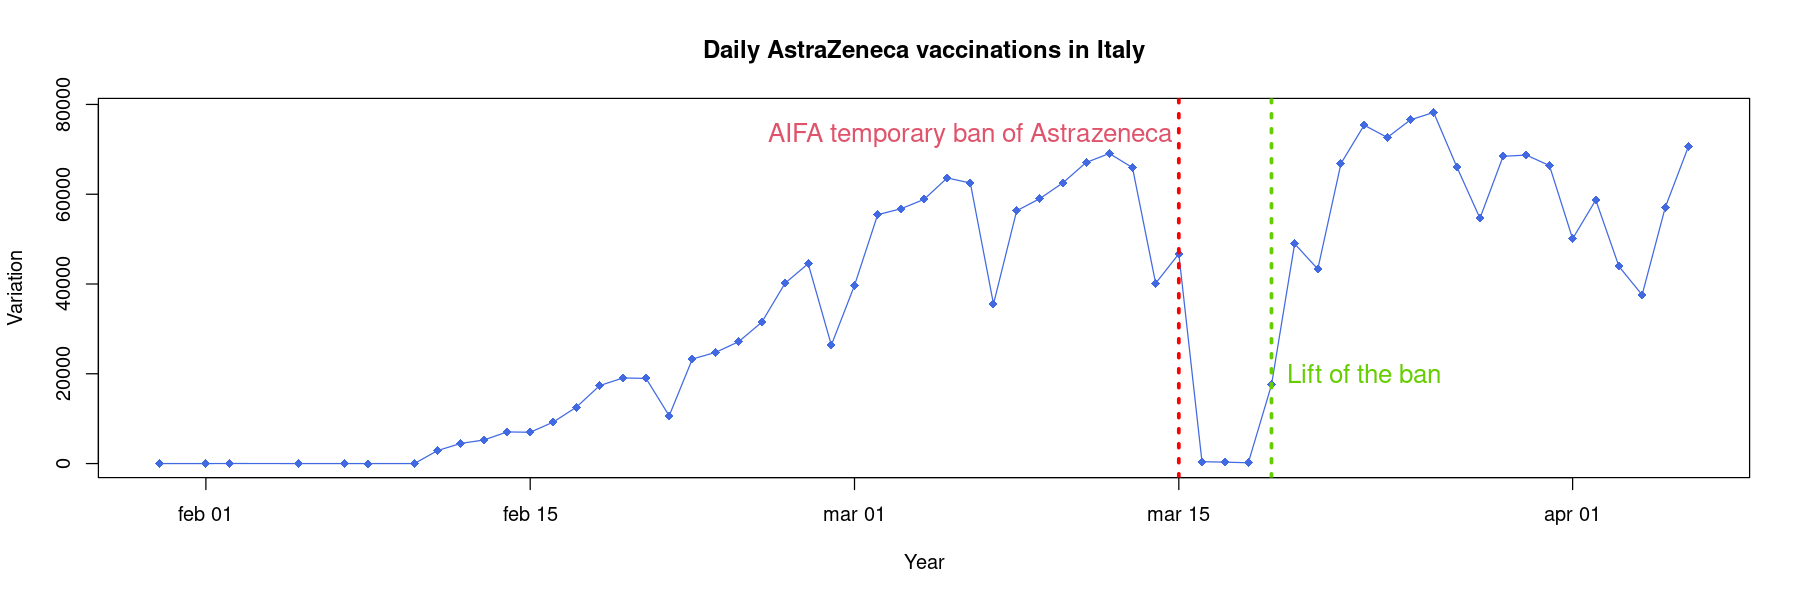

In [48]:
plot(date[-1], daily_vaccinations, pch=18, col='royalblue',main="Daily AstraZeneca vaccinations in Italy", 
     xlab='Year',ylab = 'Variation')
lines(date[-1], daily_vaccinations, col = 'royalblue')
abline(v=as.Date('2021-03-15'), col="red", lwd=3, lty=3)
abline(v=as.Date('2021-03-19'), col="chartreuse3", lwd=3, lty=3)
text(as.Date('2021-03-15')-9, 73000, "AIFA temporary ban of Astrazeneca",cex = 1.3, col = 2)
text(as.Date('2021-03-19')+4, 20000, "Lift of the ban",cex = 1.3, col = 'chartreuse3')

### References
1. [Lakes of Scotland](https://en.wikipedia.org/wiki/List_of_lochs_of_Scotland)
2. [Global crude oil prices, measured in US dollars per barrel](https://ourworldindata.org/grapher/crude-oil-prices)
3. [World’s coal production](https://ourworldindata.org/grapher/coal-production-by-country)
4. [Tibble: Simple Data Frames](https://cran.r-project.org/web/packages/tibble/index.html)
5. [Data on COVID-19 (coronavirus) vaccinations by Our World in Data](https://github.com/owid/covid-19-data/tree/master/public/data/vaccinations)